In [21]:
#import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#reading the dataset
dataset=pd.read_csv('cancer_data.csv')

In [23]:
#printing part of the dataset
print(dataset.shape)
print(dataset.head(10))

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760       

In [24]:
#Converting categorical data into numeric values i.e, 1 for Malignant, 0 for Benign
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 0 if x=='M' else 1)

In [25]:
#Defining the dependent and independent variables
y = dataset['diagnosis']
X = dataset.drop(['id','diagnosis','Unnamed: 32'], axis = 1)

In [26]:
#Splitting the dataset into testing and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Preprocessing the data i.e, standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

LINEAR REGRESSION MODEL

In [27]:
#Creating a Linear regression model
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [28]:
#Testing the model
y_pred=model1.predict(X_test)
y_pred1=[0 if x<0.5 else 1 for x in y_pred]
print(y_pred1)

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [29]:
#Confusion Matrix for Linear Regression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[56  3]
 [ 1 83]]


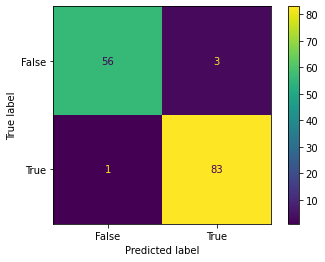

In [30]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [31]:
#Accuracy of Linear Regression Model
print("Accuracy of Linear Regression:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of Linear Regression: 0.972027972027972


In [32]:
#ROC curve for Linear Regression
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9686238902340598


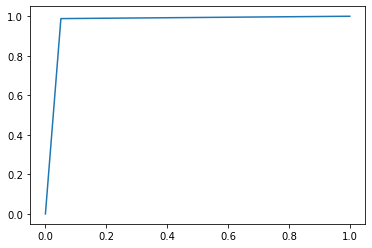

In [33]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

LOGISTIC REGRESSION MODEL

In [34]:
#Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [35]:
#Testing the model
y_pred2=model2.predict(X_test)
print(y_pred2)

[0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0]


In [36]:
#Confusion Matrix for Logistic Regression
cm2= confusion_matrix(y_test,y_pred2)
print("Confusion Matrix obtained: ")
print(cm2)

Confusion Matrix obtained: 
[[59  0]
 [ 1 83]]


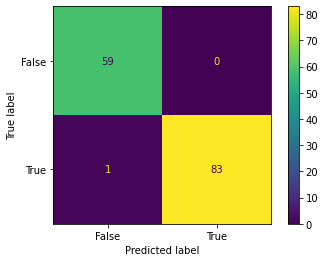

In [37]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =[False,True])
cm_display.plot()
plt.show()

In [38]:
#Accuracy of Logistic Regression Model
print("Accuracy of Logistic regression:",metrics.accuracy_score(y_test, y_pred2))

Accuracy of Logistic regression: 0.993006993006993


In [39]:
#ROC curve for Logistic Regression
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9940476190476191


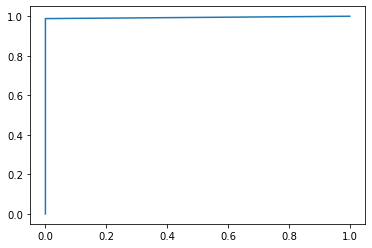

In [40]:
plt.plot(false_positive_rate,true_positive_rate)

Conclusion:

In this assignment, We have used the Breast Cancer Wisconsin(Diagnostic) Dataset to train and test our model to detect the type of cancer based on the different features present.

We have used 25% of the dataset for testing and the rest for training the model.

After implementing the Linear regression and Logistic regression models and comparing their accuracies using the confusion matrix, We observe that the Logistic regression model gives us a slightly better accuracy compared to to Linear regression.

Along with the confusion matrix, we have also plotted the ROC(Receiver operating characteristic) curve for both the models and it substantiates the fact the confusion matrix was telling us.
